# 日経平均先物 5 分足 メディアン統計

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

In [3]:
code = 'NIY=F'
symbol = '%s' % code
ticker = yf.Ticker(symbol)

In [8]:
# 日足で過去 2 年分のデータを取得
df = ticker.history(period='2d', interval='5m')
df.index = df.index.tz_convert('Asia/Tokyo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-04-14 13:00:00+09:00,34165.0,34210.0,34165.0,34210.0,0,0.0,0.0
2025-04-14 13:05:00+09:00,34200.0,34225.0,34180.0,34200.0,98,0.0,0.0
2025-04-14 13:10:00+09:00,34205.0,34235.0,34190.0,34205.0,82,0.0,0.0
2025-04-14 13:15:00+09:00,34210.0,34235.0,34210.0,34235.0,57,0.0,0.0
2025-04-14 13:20:00+09:00,34240.0,34270.0,34230.0,34250.0,124,0.0,0.0
...,...,...,...,...,...,...,...
2025-04-15 18:00:00+09:00,34375.0,34375.0,34350.0,34350.0,31,0.0,0.0
2025-04-15 18:05:00+09:00,34355.0,34355.0,34340.0,34350.0,67,0.0,0.0
2025-04-15 18:10:00+09:00,34340.0,34345.0,34325.0,34335.0,15,0.0,0.0


## Moving Median

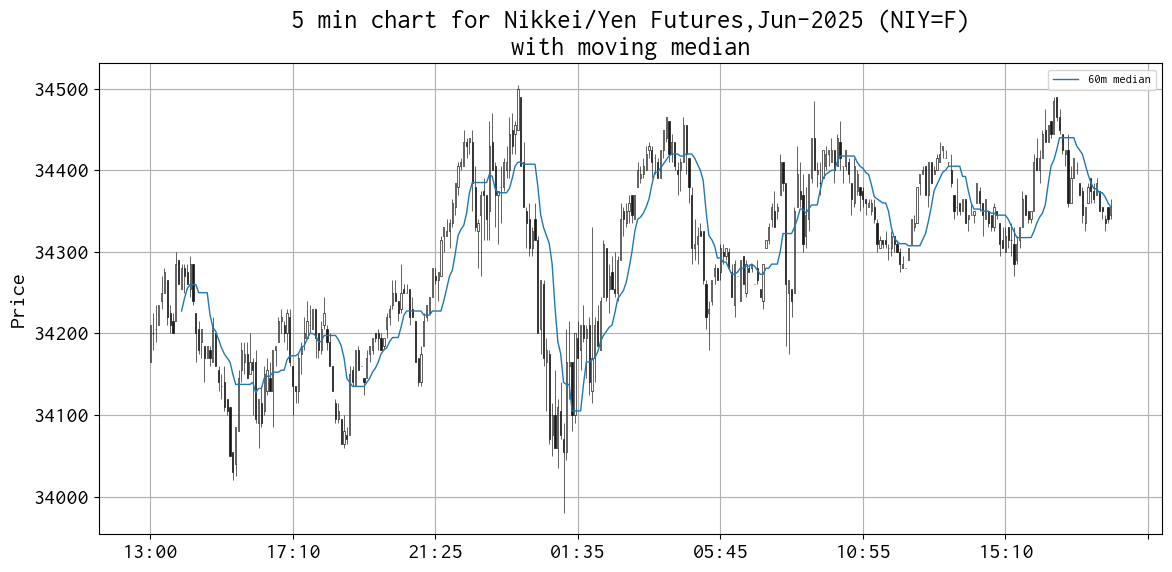

In [9]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))


mm12 = df['Close'].rolling(12).median()

apds  = [
    mpf.make_addplot(mm12[df.index], width=1, label='60m median', ax=ax),
]   

#mpf.plot(df, type='candle', style='default', volume=ax[1], datetime_format='%y-%m-%d', addplot=apds, xrotation=0, ax=ax[0])
mpf.plot(df, type='candle', style='default', datetime_format='%H:%M', addplot=apds, xrotation=0, ax=ax)

try:
    ax.set_title('5 min chart for %s (%s)\nwith moving median' % (ticker.info['shortName'], symbol))
except KeyError:
    ax.set_title('5 min chart for %s\nwith moving median' % (symbol, period))

ax.legend(loc='best', fontsize=9)
ax.grid()

plt.tight_layout()
plt.savefig('report_daily_chart_median_%s.png' % code)
plt.show()

In [6]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-04-15 05:10:00-04:00,34340.0,34345.0,34325.0,34335.0,15,0.0,0.0
2025-04-15 05:15:00-04:00,34355.0,34355.0,34340.0,34340.0,5,0.0,0.0


In [7]:
df.tail(2)['Close']

Datetime
2025-04-08 23:10:00-04:00    32050.0
2025-04-08 23:15:00-04:00    32055.0
Name: Close, dtype: float64

In [8]:
df.tail(2)['Close'].diff()

Datetime
2025-04-08 23:10:00-04:00    NaN
2025-04-08 23:15:00-04:00    5.0
Name: Close, dtype: float64

In [9]:
df['Close'].tail(1) - df['Open'].tail(1)

Datetime
2025-04-08 23:15:00-04:00   -10.0
dtype: float64

In [10]:
df['Close'].rolling(9).median().tail()

Datetime
2025-04-08 22:55:00-04:00    32170.0
2025-04-08 23:00:00-04:00    32160.0
2025-04-08 23:05:00-04:00    32120.0
2025-04-08 23:10:00-04:00    32090.0
2025-04-08 23:15:00-04:00    32060.0
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(13).median().tail()

Datetime
2025-04-08 22:55:00-04:00    32170.0
2025-04-08 23:00:00-04:00    32160.0
2025-04-08 23:05:00-04:00    32160.0
2025-04-08 23:10:00-04:00    32160.0
2025-04-08 23:15:00-04:00    32120.0
Name: Close, dtype: float64

In [12]:
df['Close'].rolling(26).median().tail()

Datetime
2025-04-08 22:55:00-04:00    32105.0
2025-04-08 23:00:00-04:00    32105.0
2025-04-08 23:05:00-04:00    32105.0
2025-04-08 23:10:00-04:00    32102.5
2025-04-08 23:15:00-04:00    32102.5
Name: Close, dtype: float64

In [13]:
df['Close'].rolling(52).median().tail()

Datetime
2025-04-08 22:55:00-04:00    31977.5
2025-04-08 23:00:00-04:00    31987.5
2025-04-08 23:05:00-04:00    31997.5
2025-04-08 23:10:00-04:00    32000.0
2025-04-08 23:15:00-04:00    32022.5
Name: Close, dtype: float64

## Robust Bollinger's bands

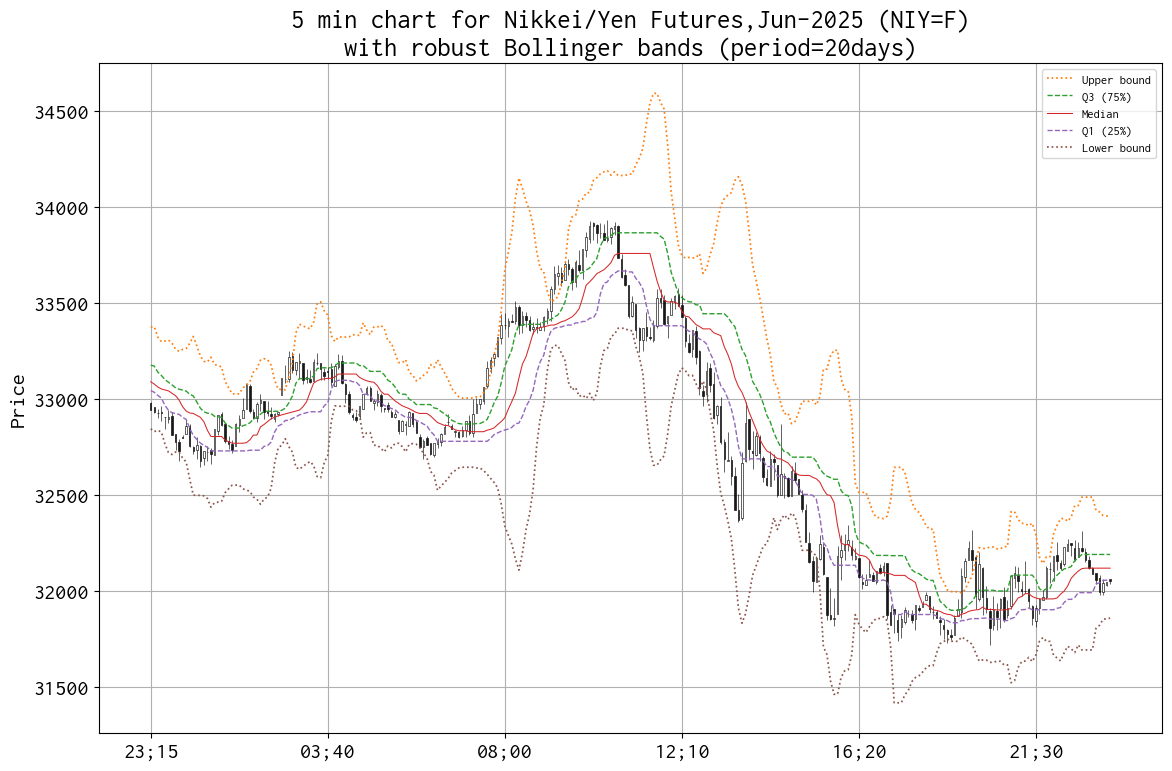

In [14]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
period = 20
mv_median = df0['Close'].rolling(period).median()
mv_q1 = df0['Close'].rolling(period).quantile(.25)
mv_q3 = df0['Close'].rolling(period).quantile(.75)
mv_iqr = mv_q3 - mv_q1
mv_lower = mv_q1 - mv_iqr * 1.5
mv_upper = mv_q3 + mv_iqr * 1.5

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(df, type='candle', style='default', addplot=apds, datetime_format='%H;%M', xrotation=0, ax=ax)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('5 min chart for %s (%s)\nwith robust Bollinger bands (period=%ddays)' % (ticker.info['shortName'], symbol, period))
except KeyError:
    ax.set_title('5 min chart for %s\nwith robust Bollinger bands (period=%ddays)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_daily_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラムと Q-Q プロット

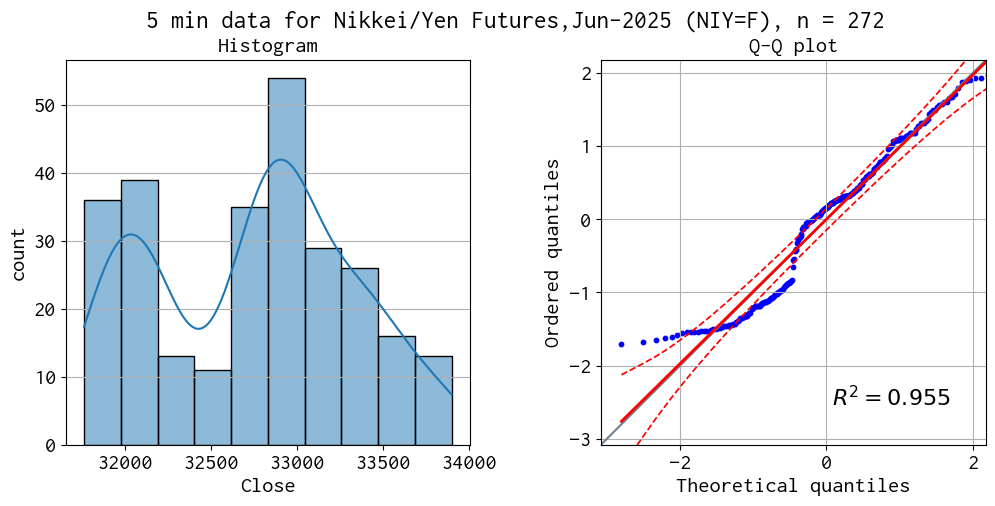

In [15]:
plt.rcParams['font.size'] = 16

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(
    df['Close'],
    kde=True,
    ax=axes[0]
)

# ヒストグラム
axes[0].set_xlabel("Close")
axes[0].set_ylabel("count")
axes[0].grid(axis = 'y')
axes[0].set_title('Histogram', fontsize=16)

# Q-Q プロット
pg.qqplot(df['Close'], s=10,  ax=axes[1])
axes[1].set_title('Q-Q plot', fontsize=16)
axes[1].grid()

plt.suptitle('5 min data for %s (%s), n = %d' % (ticker.info['shortName'], symbol, len(df)), fontsize=18)
plt.subplots_adjust(wspace=0.3)
plt.savefig('report_5min_histogram_qqplot_%s.png' % code)
plt.show()

In [16]:
ticker.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 32245.0,
 'open': 32145.0,
 'dayLow': 31720.0,
 'dayHigh': 32320.0,
 'regularMarketPreviousClose': 32245.0,
 'regularMarketOpen': 32145.0,
 'regularMarketDayLow': 31720.0,
 'regularMarketDayHigh': 32320.0,
 'volume': 9441,
 'regularMarketVolume': 9441,
 'averageVolume': 9735,
 'averageVolume10days': 0,
 'averageDailyVolume10Day': 0,
 'bid': 32050.0,
 'ask': 32055.0,
 'bidSize': 8,
 'askSize': 9,
 'expireDate': 1749772800,
 'openInterest': 36515,
 'fiftyTwoWeekLow': 31720.0,
 'fiftyTwoWeekHigh': 42430.0,
 'fiftyDayAverage': 37534.94,
 'twoHundredDayAverage': 38360.414,
 'currency': 'JPY',
 'tradeable': False,
 'quoteType': 'FUTURE',
 'symbol': 'NIY=F',
 'language': 'en-US',
 'region': 'US',
 'typeDisp': 'Futures',
 'quoteSourceName': 'Delayed Quote',
 'triggerable': False,
 'customPriceAlertConfidence': 'NONE',
 'headSymbolAsString': 'NIY=F',
 'contractSymbol': False,
 'shortName': 'Nikkei/Yen Futures,Jun-2025',
 'exchangeTimezoneShor